In [ ]:
"""
This notebook aims to create a more visual idea of the dataset. We are going to illustrate:

PLAYLISTS
- num tracks playlists
- playlist duration
- playlist number of albums
- playlist number of followers

COMMON TITLE SUBSETS
- mean number of tracks per playlist
- mean duration of playlist
- mean number of unique albums pin a playlist
- variance on duration of playlist tracks #TODO

TRACKS
- duration of tracks #TODO
- order vs popularity

"""

In [1]:
import numpy as np
import pandas as pd
import json 
from nltk.stem.lancaster import LancasterStemmer
import re
import os
import matplotlib.pyplot as plt
from scipy import stats
import sys

## Playlists 

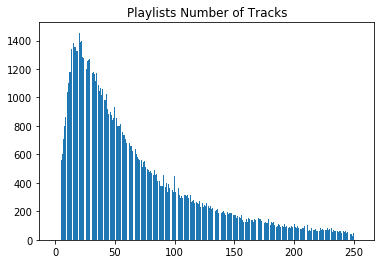

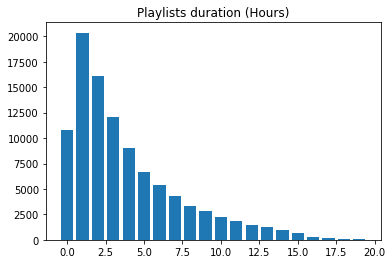

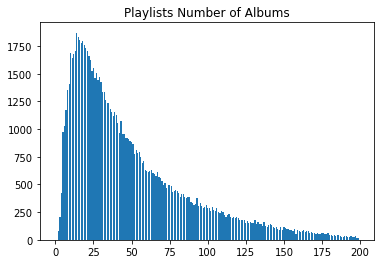

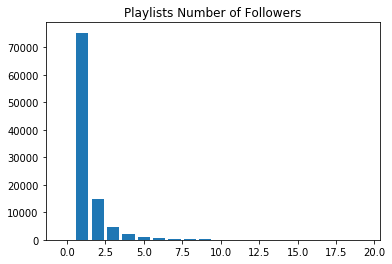

100


In [14]:
tracks_per_playlist = []
duration_of_playlist = []
albums_per_playlist = []
followers_per_playlist = []
quick =  False
max_files_for_quick_processing = 10

def process_mpd(path):
    count = 0
    filenames = os.listdir(path) #it iterates over all the elements in this folder 
    for filename in sorted(filenames):
        if filename.startswith("mpd.slice.") and filename.endswith(".json"):
            fullpath = os.sep.join((path, filename))
            f = open(fullpath)
            js = f.read()
            f.close()
            mpd_slice = json.loads(js)
            for playlist in mpd_slice['playlists']: #the data extraction is done playlist by playlist
                process_playlist(playlist)
            count += 1

            if quick and count > max_files_for_quick_processing:
                break

    plot_result()
    print(count)

def process_playlist(playlist):    
    tracks = [playlist["num_tracks"]] 
    durations = [round(playlist["duration_ms"]/3600000,0)]
    albums = [playlist["num_albums"]]
    followers = [playlist["num_followers"]]
    global tracks_per_playlist
    global duration_of_playlist
    global albums_per_playlist
    global followers_per_playlist
    tracks_per_playlist += tracks 
    duration_of_playlist += durations
    albums_per_playlist += albums
    followers_per_playlist += followers

def plot_result(): 

    y = [tracks_per_playlist.count(i) for i in range(255)]
    n = len(y)
    x = range(n)
    width = 1/1.5
    fig1, ax = plt.subplots()
    r1 = ax.bar(x,y)
    plt.title('Playlists Number of Tracks')
    plt.show()
  
    y = [duration_of_playlist.count(i) for i in range(20)]
    n = len(y)
    x = range(n)
    width = 1/1.5
    fig2, ax = plt.subplots()
    r2 = ax.bar(x,y)
    plt.title('Playlists duration (Hours)')
    plt.show()
    
    y = [albums_per_playlist.count(i) for i in range(200)]
    n = len(y)
    x = range(n)
    width = 1/1.5
    fig3, ax = plt.subplots()
    r2 = ax.bar(x,y)
    plt.title('Playlists Number of Albums')
    plt.show()
    
    y = [followers_per_playlist.count(i) for i in range(20)]
    n = len(y)
    x = range(n)
    width = 1/1.5
    fig4, ax = plt.subplots()
    r2 = ax.bar(x,y)
    plt.title('Playlists Number of Followers')
    plt.show() 
    
if __name__ == '__main__':
    path = sys.argv[1]
    if len(sys.argv) > 2 and sys.argv[2] == '--quick':
        quick = False
    #process_mpd(path)
    process_mpd(os.getcwd()+"\MPD")

# Tracks

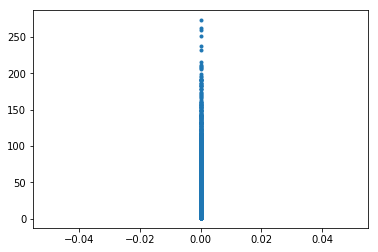

In [15]:
songs_dict=dict()
#tracks_duration=[]
quick = True
max_files_for_quick_processing = 5

def process_mpd(path):
    count = 0
    filenames = os.listdir(path) #it iterates over all the elements in this folder 
    for filename in sorted(filenames):
        if filename.startswith("mpd.slice.") and filename.endswith(".json"):
            fullpath = os.sep.join((path, filename))
            f = open(fullpath)
            js = f.read()
            f.close()
            mpd_slice = json.loads(js)
            for playlist in mpd_slice['playlists']: #the data extraction is done playlist by playlist
                process_playlist_ord_vs_pop(playlist)
            count += 1

            if quick and count > max_files_for_quick_processing:
                break

    plot_result()

def process_playlist_ord_vs_pop(playlist):    
    num_tracks = playlist["num_tracks"]
    for song in playlist["tracks"]:
        #print(song["track_uri"])
        if not song["track_uri"] in songs_dict:
            #we create a new entry with the song, and the position mean position
            songs_dict[song["track_uri"]]= {"n_ocur":0,"mean_position":0} 
        #the current values of the song counted in the previous playlists
        nur = songs_dict[song["track_uri"]]["n_ocur"]
        mpos = songs_dict[song["track_uri"]]["mean_position"] 
        #we update the number of occurences and the mean position
        songs_dict[song["track_uri"]]["n_ocur"] += 1
        songs_dict[song["track_uri"]]["mean_position"] = (mpos * nur + song["pos"]/num_tracks)/(nur+1) 

def plot_result(): 
    fig = plt.figure()    
    x = [v["mean_position"] for (k,v) in songs_dict.items()]
    y = [v["n_ocur"] for (k,v) in songs_dict.items()]     
    plt.plot(x, y,'.')
    plt.show()
    #fig.savefig('order_vs_popularity.png')    
    
if __name__ == '__main__':
    path = sys.argv[1]
    if len(sys.argv) > 2 and sys.argv[2] == '--quick':
        quick = True
    #process_mpd(path)
    process_mpd(os.getcwd()+"\MPD")

## common title playlists sets

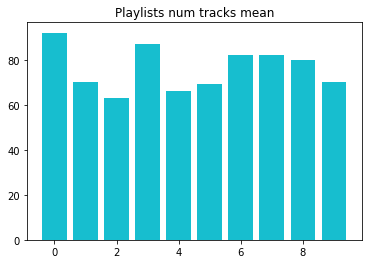

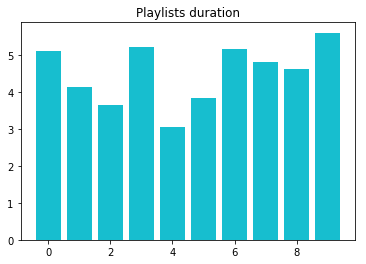

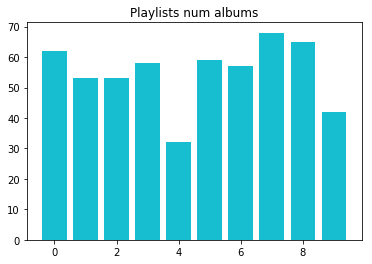

In [46]:
tracks_per_playlist = []
duration_of_playlist = []
albums_per_playlist = []
followers_per_playlist = []
quick =  False
max_files_for_quick_processing = 2

list_plot_tracks=[]
list_plot_duration = []
list_plot_albums = []

titles = pd.read_csv("common_titles.csv")

def comparison(path,num):
    for i in range(num):
        process_mpd_by_title(path, titles["name"][i])
    plot_comparison()

def process_mpd_by_title(path, title):
    count = 0
    filenames = os.listdir(path) #it iterates over all the elements in this folder 
    for filename in sorted(filenames):
        if filename.startswith("mpd.slice.") and filename.endswith(".json"):
            fullpath = os.sep.join((path, filename))
            f = open(fullpath)
            js = f.read()
            f.close()
            mpd_slice = json.loads(js)
            for playlist in mpd_slice['playlists']: #the data extraction is done playlist by playlist
                if normalize_name(playlist["name"])==title:
                    process_playlist(playlist)
            count += 1

            if quick and count > max_files_for_quick_processing:
                break
    global tracks_per_playlist
    global duration_of_playlist
    global albums_per_playlist 

    list_plot_tracks.append(tracks_per_playlist)
    list_plot_duration.append(duration_of_playlist)
    list_plot_albums.append(albums_per_playlist)

    tracks_per_playlist = []
    duration_of_playlist = []
    albums_per_playlist = []
    
    #plot_result()
    #print(count)

def normalize_name(name):
    name = name.lower()
    name = re.sub(r"[.,\/#!$%\^\*;:{}=\_`~()@]", ' ', name)
    name = re.sub(r'\s+', ' ', name).strip()
    return name 
    
def process_playlist(playlist):    
    tracks = [playlist["num_tracks"]] 
    durations = [round(playlist["duration_ms"]/3600000,0)]
    albums = [playlist["num_albums"]]
    followers = [playlist["num_followers"]]
    global tracks_per_playlist
    global duration_of_playlist
    global albums_per_playlist
    global followers_per_playlist
    tracks_per_playlist += tracks 
    duration_of_playlist += durations
    albums_per_playlist += albums
    followers_per_playlist += followers


def plot_comparison():
    for l in list_plot_duration:
        y = [sum(l)/len(l) for l in list_plot_tracks]
        n = len(y)
        x = range(n)
        plt.bar(x,y)
        plt.title('Playlists num tracks mean')
    plt.show()

    for l in list_plot_tracks:
        y = [sum(l)/len(l) for l in list_plot_duration]
        n = len(y)
        x = range(n)
        plt.bar(x,y)
        plt.title('Playlists duration')
    plt.show()

    for y in list_plot_albums:
        y = [sum(l)/len(l) for l in list_plot_albums]
        n = len(y)
        x = range(n)
        plt.bar(x,y)
        plt.title('Playlists num albums')
    plt.show()
    
if __name__ == '__main__':
    path = sys.argv[1]
    if len(sys.argv) > 2 and sys.argv[2] == '--quick':
        quick = False
    #process_mpd(path)
    #process_mpd_by_title(os.getcwd()+"\MPD", "country")
    comparison(os.getcwd()+"\MPD", 10)

In [48]:
titles[0:10]

,name,count
0,country,2531
1,chill,1769
2,workout,979
3,rap,856
4,christmas,850
5,oldies,848
6,rock,688
7,party,614
8,throwback,524
9,worship,490
